# Model a relation in a dataset using a regression
### We using Ecommerce Customers dataset located in data.txt
### Andrii Glukhyi

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib
import seaborn as sns; sns.set(style="white", color_codes=True)
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [18]:
data = pd.read_csv('data.csv')

### 5 rows of the dataset

In [19]:
data.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### description and the info on the dataset

In [20]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


### Jointplot function to see which fields correlate well with the "Yearly Amount Spent"

/home/andrew/codefellows/401/data-science/ENV/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


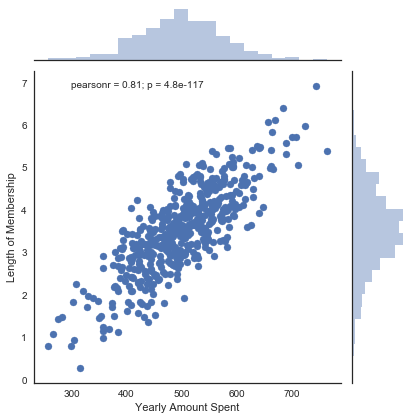

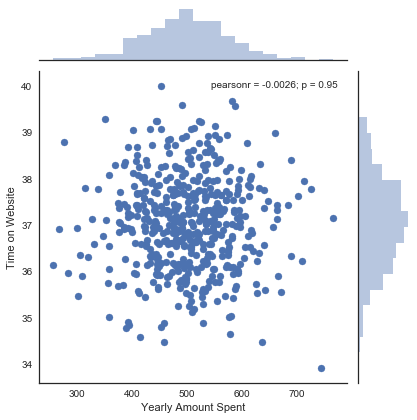

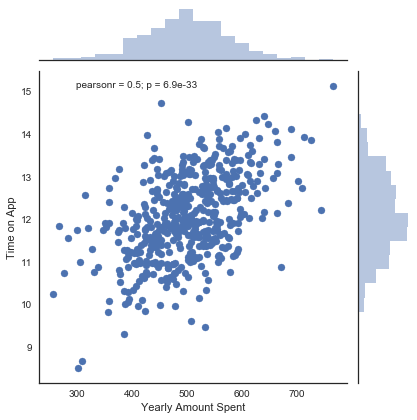

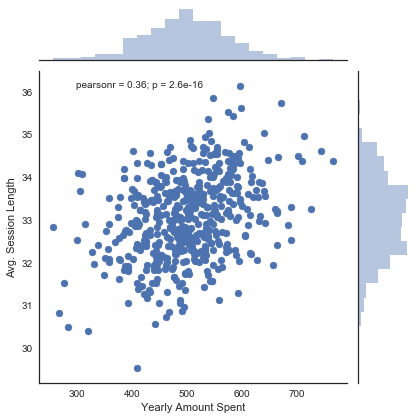

In [22]:
sns.jointplot(x = 'Yearly Amount Spent' , y = 'Length of Membership', data = data)
sns.jointplot(x = 'Yearly Amount Spent' , y = 'Time on Website', data = data)
sns.jointplot(x = 'Yearly Amount Spent' , y = 'Time on App', data = data)
sns.jointplot(x = 'Yearly Amount Spent' , y = 'Avg. Session Length', data = data)


#### On my opinion 'Time On Website' and 'Yearly amount Spent' corelets well. In this particular example 

### Summary plot of feature relationships

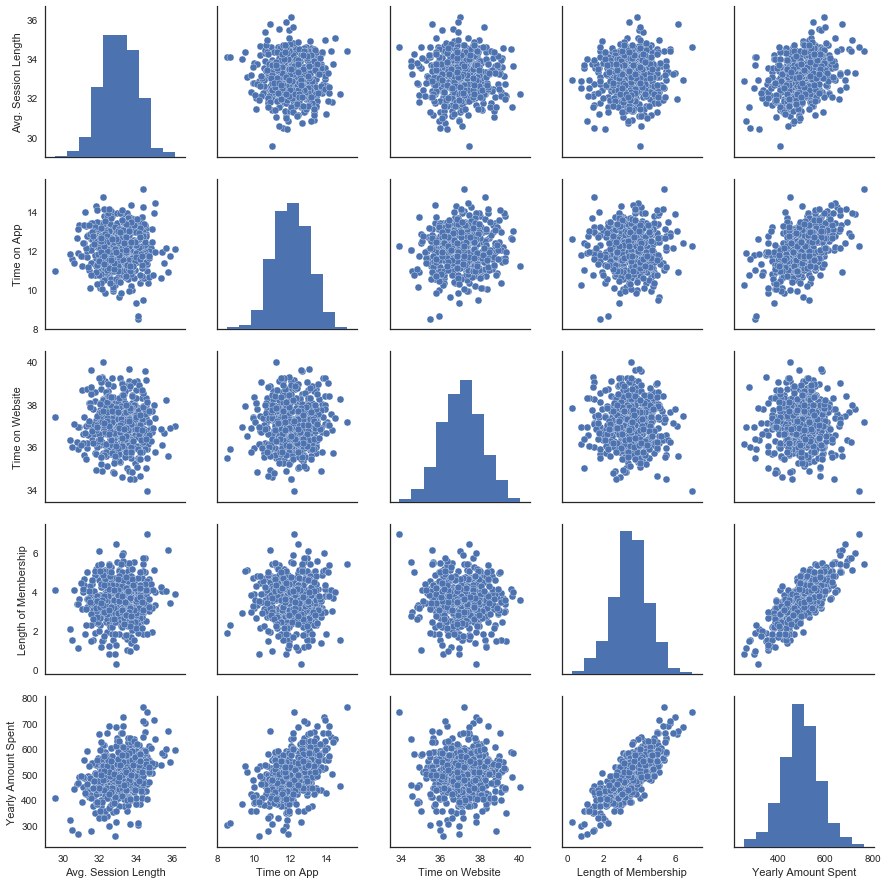

In [23]:
sns.pairplot(data)

### Two dataframes: one for the target variable ("Yearly Amount Spent"), the other - containing all the rest of numerical features

In [24]:
yearly_amount = data['Yearly Amount Spent']

In [25]:
rest_of_data = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

### Split the data into a training and test sets.

In [26]:
rest_train, rest_test, yearly_train, yearly_test = train_test_split(rest_of_data, yearly_amount, test_size=0.3, random_state=123)

### Fit a regression model on the training set

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(rest_train, yearly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Print out the coefficients of the model

In [28]:
print(lr.coef_)

[25.36266491 38.82367921  0.80356799 61.54905291]


### Make a prediction of the target variable from features dataframe

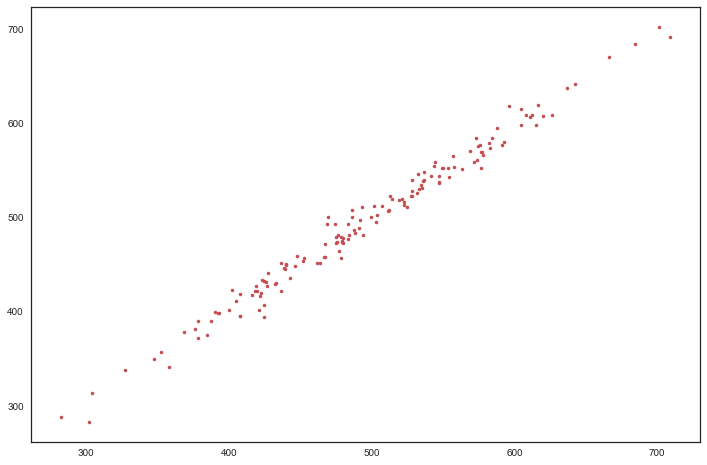

In [29]:
pred = lr.predict(rest_test)
plt.plot(yearly_test, pred, "r.")

### Using Seaborn distplot show the histogram of the residuals - differences between the target variable and predicted target variable

In [30]:
print("Mean squared error: %.2f"
      % mean_squared_error(yearly_test, pred))
print("Root Mean squared error: %.2f"
    % np.sqrt(mean_squared_error(yearly_test, pred)))

Mean squared error: 102.72
Root Mean squared error: 10.14


### Calculate the Mean Squared Error (using sklearn.metrics module)

/home/andrew/codefellows/401/data-science/ENV/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


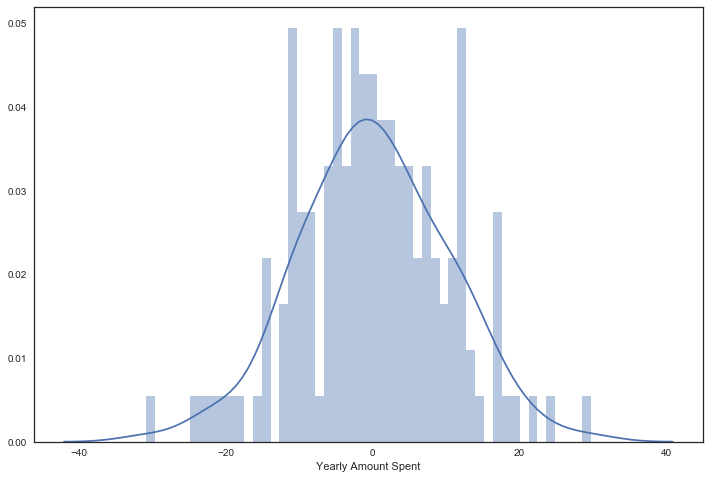

In [31]:
residuals = yearly_test - pred
sns.distplot(yearly_test - pred, bins=50)

### Answer the main question: How should we allocate the engineering budget between website development and app development?

### seems like yea. Stick with app would be better idea